# DATA TESTING USING ALL 3 MODELS

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix  


test_data = pd.read_csv('group11_test.csv', delimiter=",", header=None)
X_test=test_data.iloc[:,0:17].astype(float)
y_test=test_data.iloc[:,-1]

import matplotlib.pyplot as plt

 *_feature scaling_*

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test=scaler.fit_transform(X_test)

In [3]:
## Pie chart to distplay different accuracy percentage proportion of each model
def print_chart(_conf_matrix,title):
    
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'True positive ', 'False Negative', 'False Positive', 'True Negative'
    g1=_conf_matrix[0][0]
    g2=_conf_matrix[0][1]
    g3=_conf_matrix[1][0]
    g4=_conf_matrix[1][1]
    sizes = [g1, g2, g3,g4]

    explode = (0, 0.0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.set_title(title,size=18, weight="bold", color="red")
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
    
####################################################
#plot a matrix
def plot_matrix(cm,name):

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title(name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()


## SUPPORT VECTOR MACHINE TEST

In [4]:
#the SVM trained saved model
%store -r svclassifier
from sklearn.metrics import average_precision_score

In [5]:
#from sklearn.svm import SVC
clf = svclassifier
y_pred = clf.predict(X_test)

SVM Accuracy: 86.58280922431865%


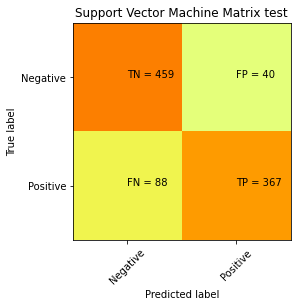


Classification Report for SVM

               precision    recall  f1-score   support

           0       0.84      0.92      0.88       499
           1       0.90      0.81      0.85       455

    accuracy                           0.87       954
   macro avg       0.87      0.86      0.86       954
weighted avg       0.87      0.87      0.87       954



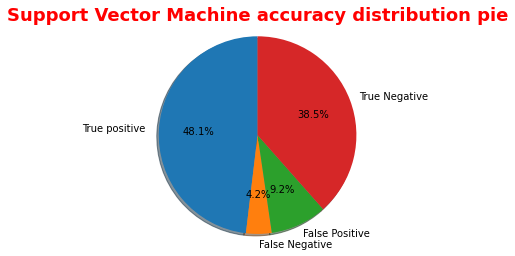

In [6]:
print("SVM Accuracy: {}%".format(svclassifier.score(X_test, y_test) * 100 ))
plot_matrix(confusion_matrix(y_test, y_pred), name="Support Vector Machine Matrix test")
print("\nClassification Report for SVM\n\n",classification_report( y_test,y_pred) )
k=print_chart(confusion_matrix(y_test, y_pred), title="Support Vector Machine accuracy distribution pie")

# LOG REGRESSION TESTING

In [7]:
#the SVM trained saved model
%store -r logmodel

In [8]:
y2_pred =logmodel.predict(X_test)  

Logistic regression Accuracy: 84.80083857442348%


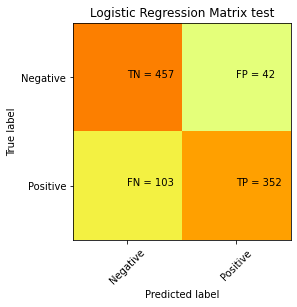


Classification Report for Logistic Regression

               precision    recall  f1-score   support

           0       0.82      0.92      0.86       499
           1       0.89      0.77      0.83       455

    accuracy                           0.85       954
   macro avg       0.85      0.84      0.85       954
weighted avg       0.85      0.85      0.85       954



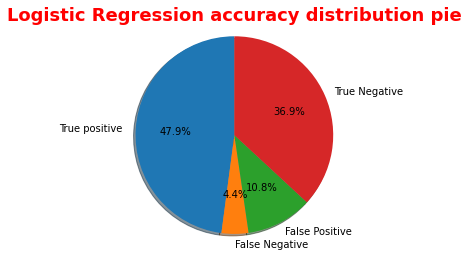

In [9]:
print("Logistic regression Accuracy: {}%".format(logmodel.score(X_test, y_test) * 100 ))
plot_matrix(confusion_matrix(y_test, y2_pred), name="Logistic Regression Matrix test")
print("\nClassification Report for Logistic Regression\n\n",classification_report( y_test,y2_pred) )
print_chart(confusion_matrix(y_test, y2_pred), title="Logistic Regression accuracy distribution pie")

# NEURAL NETWORKS TESING

In [10]:
%store -r clf

In [11]:
y3_pred =clf.predict(X_test)  

In [12]:
#print("Neural Network Accuracy: {}%".format(knn.score(X_test, y_test) * 100 ))


Neural Network Accuracy: 82.80922431865828%


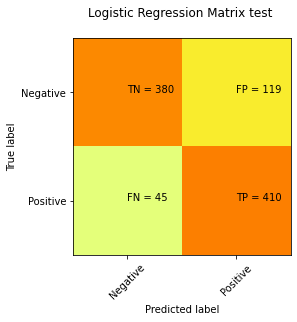


Classification Report for Neural Network

               precision    recall  f1-score   support

           0       0.89      0.76      0.82       499
           1       0.78      0.90      0.83       455

    accuracy                           0.83       954
   macro avg       0.83      0.83      0.83       954
weighted avg       0.84      0.83      0.83       954



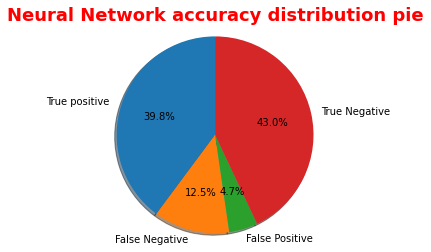

In [13]:
print("\nNeural Network Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))
plot_matrix(confusion_matrix(y_test, y3_pred), name="Logistic Regression Matrix test \n")
print("\nClassification Report for Neural Network\n\n",classification_report( y_test,y3_pred) )
k=print_chart(confusion_matrix(y_test, y3_pred), title="Neural Network accuracy distribution pie")

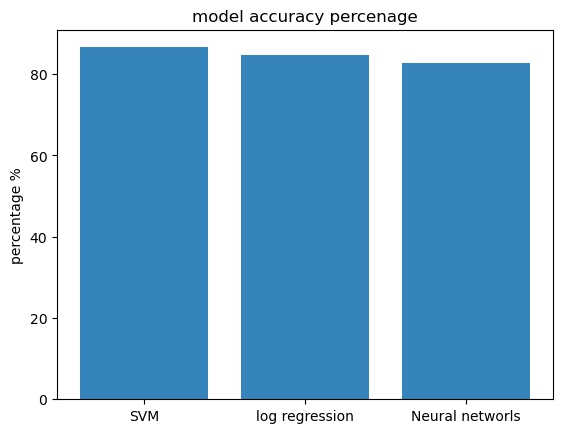

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('SVM','log regression', 'Neural networls')
y_pos = np.arange(len(objects))
performance = [(svclassifier.score(X_test, y_test) * 100 ),(logmodel.score(X_test, y_test) * 100 ),(clf.score(X_test, y_test) * 100 )]

plt.bar(y_pos,performance ,align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('percentage %')
plt.title('model accuracy percenage')

plt.show()

In [ ]:
#SVM appears to be the winner, in terms of accuracy percentage